<a href="https://colab.research.google.com/github/Samhitaa-DS/LOGISTIC-DEPLOYMENT/blob/main/Mail_Classification_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data=pd.read_csv("Hamspam.csv",encoding='ISO-8859-1')

FileNotFoundError: [Errno 2] No such file or directory: 'Hamspam.csv'

In [ ]:
data.head(10)


,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...
5,ham,Aiya we discuss later lar... Pick u up at 4 is...
6,ham,Are you this much buzy
7,ham,Please ask mummy to call father
8,spam,Marvel Mobile Play the official Ultimate Spide...
9,ham,"fyi I'm at usf now, swing by the room whenever"


In [ ]:

data.isnull().sum()

NameError: name 'data' is not defined

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


# Data Cleaning

In [ ]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[0-9' ']+',"",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)


In [ ]:
clean("I am'''''.. 090 a girl")

'i am  a girl'

In [ ]:
data['text'] = data.text.apply(clean)
data.head(10)

,type,text
0,ham,hope you are having a good week just checking in
1,ham,kgive back my thanks
2,ham,am also doing in cbe only but have to pay
3,spam,complimentary star ibiza holiday or å£ cash n...
4,spam,okmail dear dave this is your final notice to ...
5,ham,aiya we discuss later lar pick u up at is it
6,ham,are you this much buzy
7,ham,please ask mummy to call father
8,spam,marvel mobile play the official ultimate spide...
9,ham,fyi im at usf now swing by the room whenever


In [ ]:
#Word frequency
freq = pd.Series(' '.join(data['text']).split()).value_counts()[:20] # for top 20
freq

,count
to,2243
i,2228
you,2118
a,1437
the,1323
u,1298
and,965
is,892
in,886
me,789


In [ ]:
#removing stopwords

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.head()

,type,text
0,ham,hope good week checking
1,ham,kgive back thanks
2,ham,also cbe pay
3,spam,complimentary star ibiza holiday å£ cash needs...
4,spam,okmail dear dave final notice collect tenerife...


In [ ]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(data['text']).split()).value_counts()[:20] # for top 20
freq_Sw

,count
u,1298
call,577
im,462
ur,389
get,384
å£,293
dont,287
go,282
ok,278
free,275


In [ ]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 2, max_df = 0.9)
X = vectorizer.fit_transform(data["text"])
# Use get_feature_names_out() instead of get_feature_names()
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

In [ ]:
pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())

,aah,aathilove,aathiwhere,abi,ability,abiola,abj,able,abt,abta,...,ââèïs,ââèït,ûªd,ûªday,ûªm,ûªs,ûªt,ûªve,ûï,ûò
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
word_freq_df.head(30)

,term,occurrences,frequency
0,aah,3,0.000072
1,aathilove,3,0.000072
2,aathiwhere,3,0.000072
3,abi,4,0.000097
4,ability,2,0.000048
5,abiola,11,0.000266
6,abj,2,0.000048
7,able,26,0.000628
8,abt,26,0.000628
9,abta,3,0.000072


In [ ]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data["text"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()

df = pd.DataFrame(denselist, columns = names_features)

In [ ]:
df

,abiola,able,abt,accept,access,account,actually,add,address,admirer,...,youve,yr,yrs,yup,ââ,ââèïs,ââèït,ûªs,ûªt,ûï
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# N-gram

In [ ]:
#Bi-gram

def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
top2_words = get_top_n2_words(data["text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df

,Bi-gram,Freq
0,please call,53
1,call later,50
2,ill call,48
3,let know,40
4,sorry ill,39
...,...,...
195,claim easy,8
196,win cash,8
197,ok ill,8
198,lemme know,8


<ipython-input-24-3133794899>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])


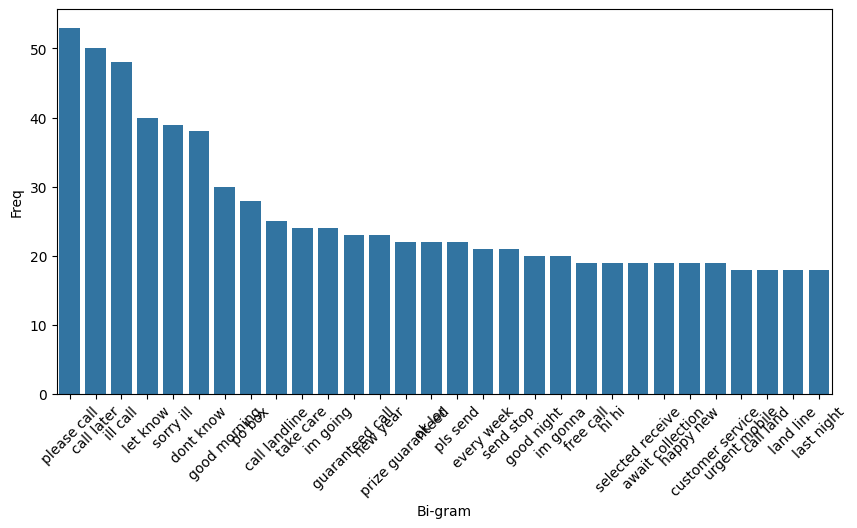

In [ ]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:30,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])
plt.show()

In [ ]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]


In [ ]:
top3_words = get_top_n3_words(data["text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [ ]:
top3_df

,Tri-gram,Freq
0,ill call later,42
1,sorry ill call,38
2,prize guaranteed call,21
3,call land line,18
4,happy new year,18
...,...,...
195,said mind go,5
196,mind go bedroom,5
197,go bedroom minute,5
198,bedroom minute ok,5


<ipython-input-28-3293085942>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])


[Text(0, 0, 'ill call later'),
 Text(1, 0, 'sorry ill call'),
 Text(2, 0, 'prize guaranteed call'),
 Text(3, 0, 'call land line'),
 Text(4, 0, 'happy new year'),
 Text(5, 0, 'private account statement'),
 Text(6, 0, 'guaranteed call land'),
 Text(7, 0, 'call identifier code'),
 Text(8, 0, 'land line claim'),
 Text(9, 0, 'draw shows prize'),
 Text(10, 0, 'shows prize guaranteed'),
 Text(11, 0, 'identifier code expires'),
 Text(12, 0, 'pls send message'),
 Text(13, 0, 'account statement shows'),
 Text(14, 0, 'statement shows unredeemed'),
 Text(15, 0, 'camcorder reply call'),
 Text(16, 0, 'cant pick phone'),
 Text(17, 0, 'pick phone right'),
 Text(18, 0, 'phone right pls'),
 Text(19, 0, 'right pls send')]

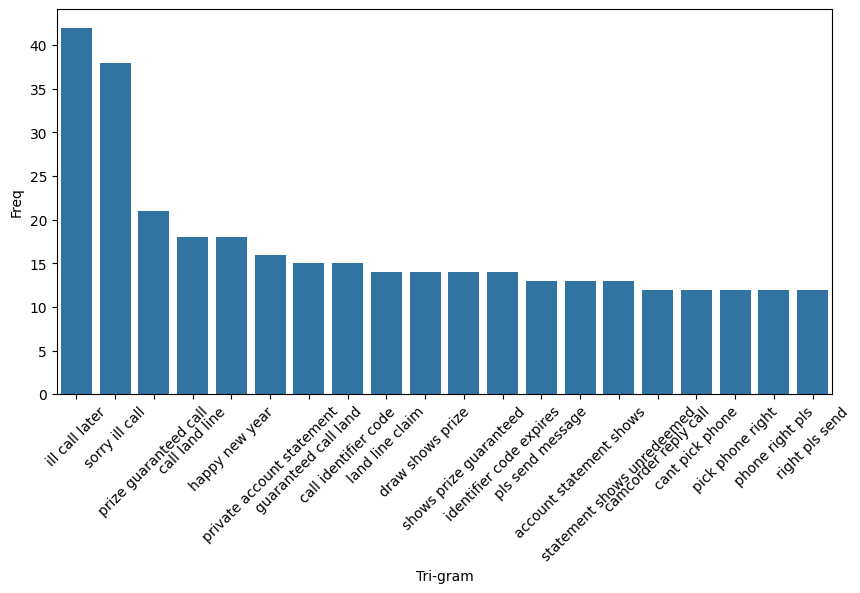

In [ ]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

# WordCloud

In [ ]:
#removing stopwords

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
string_Total = " ".join(data["text"])
string_Total

'hope good week checking kgive back thanks also cbe pay complimentary star ibiza holiday å£ cash needs urgent collection landline lose okmail dear dave final notice collect tenerife holiday cash award call landline tcs sae aiya discuss later lar pick u much buzy please ask mummy call father marvel mobile play official ultimate spiderman game å£ ur mobile right text spider game send u free wallpaper fyi im usf swing room whenever sure thing big man hockey elections shouldn\x89ââèït go longer hour though anything lor march ending ready call sure problem capital never complete far hows work ladies hmm well night night k ill sure get noon see whats ha ha cool cool chikku chikkudb darren saying dat u meeting da ge den dun meet dinner cos later u leave xy feel awkward den u meet lunch lor dint tell anything angry told abi u u wan come come lor din c stripes skirt u win å£ music gift vouchers every week starting txt word draw tscs wwwldewcom coming gym machan goodnight arr birthday today wish

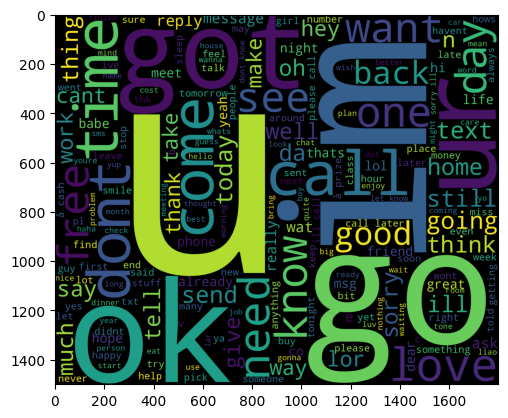

In [ ]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

# Applying naive bayes for classification

In [ ]:
data.head()

,type,text
0,ham,hope good week checking
1,ham,kgive back thanks
2,ham,also cbe pay
3,spam,complimentary star ibiza holiday å£ cash needs...
4,spam,okmail dear dave final notice collect tenerife...


In [ ]:
def split_into_words(i):
    return (i.split(" "))


In [ ]:
"This is a single line string".split(" ")

['This', 'is', 'a', 'single', 'line', 'string']

In [ ]:
str="hope/good week checking"
str.split('/')

['hope', 'good week checking']

In [ ]:
from sklearn.model_selection import train_test_split

email_train,email_test = train_test_split(data,test_size=0.3,random_state=0)

In [ ]:
email_train

,type,text
1389,ham,make squeezed bucks dad
5464,ham,hopeing wasnââèït pissed remember gone sister...
5370,ham,found enc
283,ham,unlimited texts limited minutes
3524,spam,valued vodafone customer computer picked win å...
...,...,...
4931,ham,im home please call
3264,ham,morning ok
1653,ham,tee hee lecture cheery bye bye
2607,spam,free message activate free text messages reply...


In [ ]:
# Preparing email texts into word count matrix format
emails_bow = CountVectorizer(analyzer=split_into_words).fit(data.text)

# ["mailing","body","texting"]
# ["mailing","awesome","good"]

# ["mailing","body","texting","good","awesome"]



#        "mailing" "body" "texting" "good" "awesome"
#  0          1        1       1        0       0

#  1          1        0        0       1       1



In [ ]:
# For all messages
all_emails_matrix = emails_bow.transform(data.text)
all_emails_matrix.shape

(5559, 8175)

In [ ]:
# For training messages
train_emails_matrix = emails_bow.transform(email_train.text)
train_emails_matrix.shape # (3891,7488)

# For testing messages
test_emails_matrix = emails_bow.transform(email_test.text)
test_emails_matrix.shape # (1668,7488)

(1668, 8175)

In [ ]:
train_emails_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
####### Without TFIDF matrices ########################
# Preparing a naive bayes model on training data set

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
import numpy as np
classifier_mb = MB()
classifier_mb.fit(train_emails_matrix,email_train.type)
train_pred_m = classifier_mb.predict(train_emails_matrix)
accuracy_train_m = np.mean(train_pred_m==email_train.type)
print(accuracy_train_m) # 98%

test_pred_m = classifier_mb.predict(test_emails_matrix)
accuracy_test_m = np.mean(test_pred_m==email_test.type) # 96%
print(accuracy_test_m)


0.9879208429709586
0.9664268585131894


In [ ]:
# Gaussian Naive Bayes9-0
classifier_gb = GB()
classifier_gb.fit(train_emails_matrix.toarray(),email_train.type.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train_emails_matrix.toarray())
accuracy_train_g = np.mean(train_pred_g==email_train.type) # 95%
print(accuracy_train_g )
test_pred_g = classifier_gb.predict(test_emails_matrix.toarray())
accuracy_test_g = np.mean(test_pred_g==email_test.type) # 90%
print(accuracy_test_g)

0.9465433050629658
0.8860911270983214


# Using TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

# Learning Term weighting and normalizing on entire emails
tfidf_transformer = TfidfTransformer().fit(all_emails_matrix)

# Preparing TFIDF for train emails
train_tfidf = tfidf_transformer.transform(train_emails_matrix)

print(train_tfidf.shape) # (3891, 7488)

# Preparing TFIDF for test emails
test_tfidf = tfidf_transformer.transform(test_emails_matrix)

print(test_tfidf.shape) #  (1668,7488)



(3891, 8175)
(1668, 8175)


In [ ]:
# Preparing a naive bayes model on training data set

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_tfidf,email_train.type)
train_pred_m = classifier_mb.predict(train_tfidf)
accuracy_train_m = np.mean(train_pred_m==email_train.type) # 96%
print(accuracy_train_m)
test_pred_m = classifier_mb.predict(test_tfidf)
accuracy_test_m = np.mean(test_pred_m==email_test.type) # 96%
print(accuracy_test_m)



0.9699306090979183
0.9688249400479616


In [ ]:
accuracy_train_m

In [ ]:
# Gaussian Naive Bayes
classifier_gb = GB()
classifier_gb.fit(train_tfidf.toarray(),email_train.type.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train_tfidf.toarray())
accuracy_train_g = np.mean(train_pred_g==email_train.type) # 95%
test_pred_g = classifier_gb.predict(test_tfidf.toarray())
accuracy_test_g = np.mean(test_pred_g==email_test.type) # 88%

# inplace of tfidf we can also use train_emails_matrix and test_emails_matrix instead of term inverse document frequency matrix

In [ ]:
accuracy_test_g

np.float64(0.8830935251798561)

In [ ]:
accuracy_train_g

np.float64(0.9465433050629658)